In [1]:
!pip install shap
import pandas as pd
import shap
import sklearn
from sklearn.preprocessing import LabelEncoder
data = 'https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv'
dataset = pd.read_csv(data)
encoder=LabelEncoder()
dataset["Sleep Stage"]=encoder.fit_transform(dataset["Sleep Stage"])
shap.initjs()
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

dataset.head()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)



from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)

X_test =sc.fit_transform(X_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [2]:
features_names=list(dataset.iloc[0:0, 0:75])
print(features_names)

['Sleep Stage', 'MeanP_Alpha_F4', 'MedianF_Alpha_F4', 'MeanF_Alpha_F4', 'Spectral Edge_Alpha_F4', 'PeakF_Alpha_F4', 'MeanP_Beta_F4', 'MedianF_Beta_F4', 'MeanF_Beta_F4', 'Spectral Edge_Beta_F4', 'PeakF_Beta_F4', 'MeanP_Theta_F4', 'MedianF_Theta_F4', 'MeanF_Theta_F4', 'Spectral Edge_Theta_F4', 'PeakF_Theta_F4', 'MeanP_Delta_F4', 'MedianF_Delta_F4', 'MeanF_Delta_F4', 'Spectral Edge_Delta_F4', 'PeakF_Delta_F4', 'MeanP_Gamma_F4', 'MedianF_Gamma_F4', 'MeanF_Gamma_F4', 'Spectral Edge_Gamma_F4', 'PeakF_Gamma_F4', 'MeanP_Alpha_C4', 'MedianF_Alpha_C4', 'MeanF_Alpha_C4', 'Spectral Edge_Alpha_C4', 'PeakF_Alpha_C4', 'MeanP_Beta_C4', 'MedianF_Beta_C4', 'MeanF_Beta_C4', 'Spectral Edge_Beta_C4', 'PeakF_Beta_C4', 'MeanP_Theta_C4', 'MedianF_Theta_C4', 'MeanF_Theta_C4', 'Spectral Edge_Theta_C4', 'PeakF_Theta_C4', 'MeanP_Delta_C4', 'MedianF_Delta_C4', 'MeanF_Delta_C4', 'Spectral Edge_Delta_C4', 'PeakF_Delta_C4', 'MeanP_Gamma_C4', 'MedianF_Gamma_C4', 'MeanF_Gamma_C4', 'Spectral Edge_Gamma_C4', 'PeakF_Gamma

In [3]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(max_depth=2)
xgb_classifier.fit(X_train, y_train)  
y_pred_XG = xgb_classifier.predict(X_test)

In [4]:
# Fits the explainer
explainer = shap.Explainer(xgb_classifier.predict, X_test[0:100])
# Calculates the SHAP values - It takes some time
shap_values = explainer( X_test[0:100])

Permutation explainer: 101it [01:37,  1.03s/it]


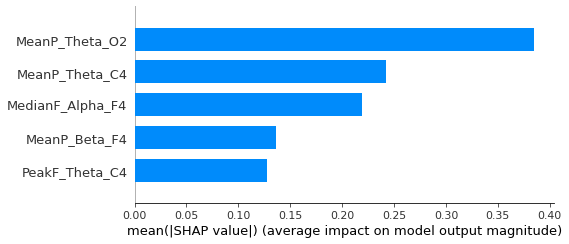

In [5]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=5,feature_names=features_names)

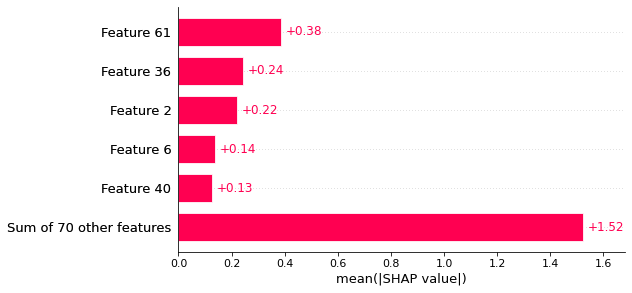

In [6]:
shap.plots.bar(shap_values,max_display=6)

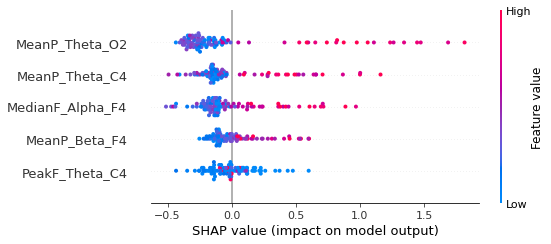

In [7]:
shap.summary_plot(shap_values,max_display=5,feature_names=features_names)

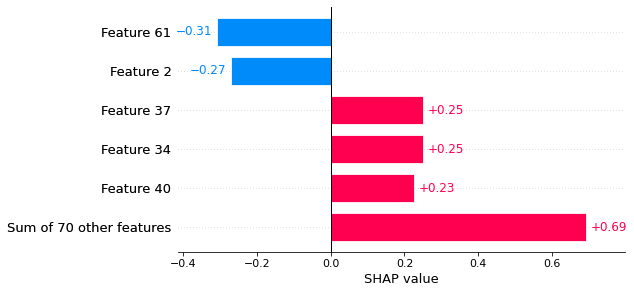

In [8]:
shap.plots.bar(shap_values[1],max_display=6)

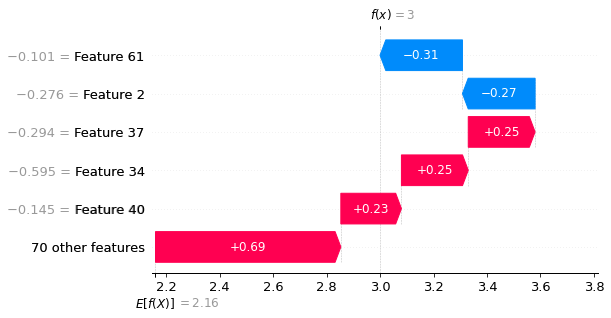

In [9]:

shap.plots.waterfall(shap_values[1],max_display=6)

In [10]:
shap.initjs()
shap.plots.force(shap_values[1],feature_names=features_names)



---



In [11]:
explainer = shap.TreeExplainer(xgb_classifier)

start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [12]:
shap.initjs()
# Force plot
prediction = xgb_classifier.predict(X_test[start_index:end_index])[0]
print(f"The XG predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],feature_names=features_names)

The XG predicted: 3


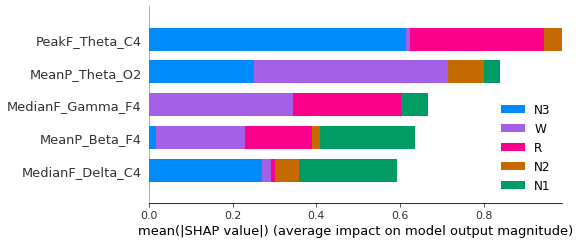

In [13]:
shap.summary_plot(shap_values, X_test[start_index:end_index], plot_type="bar",class_names=["N1","N2","N3","R","W"],max_display=5,feature_names=features_names)